<a href="https://colab.research.google.com/github/SUNWOUNG/HOMEWORK/blob/main/ML4MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
#Material Parameters
E_1   = 1 # Young's Modulus
E_2 = 1 # E2 Modulus related to back-stress
V   = 10 # Viscosity

n   = 100 #Number of time steps

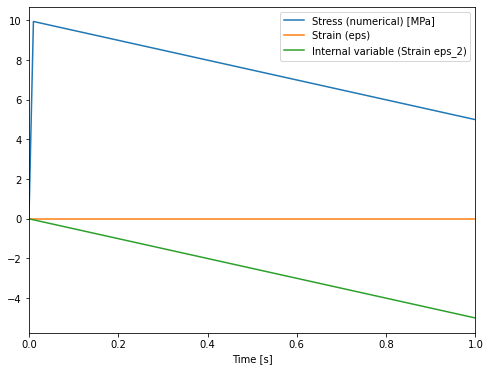

In [39]:
tau       = V/E_2                                    #Relaxation time
t_start   = 0                                        #Start time
t_end     = 1                                       #End time
dt        = (t_end - t_start)/n                      #Time step size
eps_0     = 0                                      #Strain at 0 time
eps       = np.zeros(n+1)                            #Strain
eps       = eps + eps_0
t         = np.arange(t_start, t_end+dt, dt)         #Time
eps_2     = np.zeros(n+1)
sig       = np.zeros(n+1)                            #Stress
sig[0]    = E * eps[0] + E_2 * (eps[0] - eps_2[0])
sig_exact = np.zeros(n+1)                            #Analytical stress
    
#Numerical Solution
for i in range(0, n):
    eps_2[i+1] = (E_1/(E_1 + E_2)) * (dt * eps[i+1])  -  (V/(E_1 + E_2) * dt) + eps_2[i]
    sig[i+1]   = V + (E_2 * eps_2[i+1])
    
#Analytical Solution
#for i in range(0, n+1):
#    sig_exact[i] = eps_0 * (E + E_2 * math.exp(-t[i]/tau))
    
#Plotting
plt.figure(figsize=(8,6))
plt.plot(t,sig, label = "Stress (numerical) [MPa]")
#plt.plot(t,sig_exact, label = "Stress (analytical) [MPa]")
plt.plot(t,eps, label = "Strain (eps)")
plt.plot(t,eps_2, label = "Internal variable (Strain eps_2)")
plt.legend(loc = "upper right")
plt.xlabel("Time [s]")
plt.xlim(0, 1)
#plt.yticks(np.arange(0, 2.2, 0.2))
#plt.savefig("task_5.png") 
plt.show()

#   return E, E_2, V, n

In [ ]:
import random
A= np.random.rand(10) * 0.1
B= A* -1
C= [0]

D= np.concatenate((A,B,C))


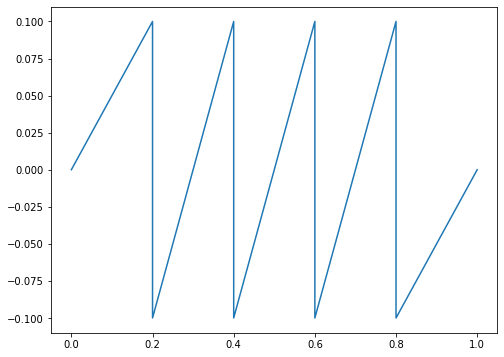

In [67]:
import pandas as pd
import torch

df= pd.read_csv('sample_data/train.csv')  


Time = list(df)[0]

Strain = list(df)[-1]

X = df[Time]
y = df[Strain]


plt.figure(figsize=(8,6))
plt.plot(X, y)

#strain = torch.from_numpy(D)

#print(strain)

[ 0.09354624  0.0121875   0.01316515  0.01506131  0.05696662  0.04463354
  0.09039632  0.02865259  0.06685575  0.04521138 -0.09354624 -0.0121875
 -0.01316515 -0.01506131 -0.05696662 -0.04463354 -0.09039632 -0.02865259
 -0.06685575 -0.04521138  0.        ]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


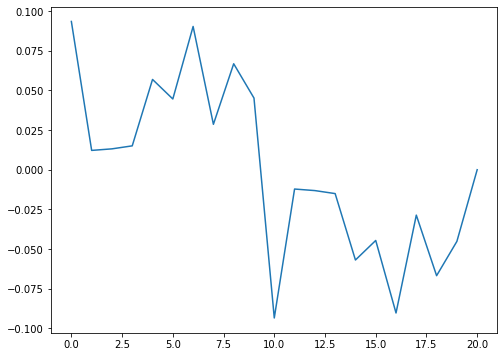

In [38]:
import numpy as np
from sciann import Variable, Functional, SciModel
from sciann.constraints import Data

t = np.linspace(0, 1, 100)
y = D

t = Variable("t", dtype='float32')
y = Functional(
    "D", 
    [0, x**2, x**3, sin(x), cos(x), 0],
    hidden_layers = [0,0.2, 0.4, 0.6, 0.8, 1],
    activations = 'tanh',
)

model = SciModel(x, Data(y))

# Solve the neural network model.
model.solve(x_true, y_true, epochs=32, batches=10)

# Find model's prediciton. 
y_pred = model.predict(x_true)